<a href="https://colab.research.google.com/github/Ch-Ibrahim/PortfolioProjects/blob/main/lazyPredict_Happy_Happy_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
pip install lazypredict

In [60]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [61]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [62]:
url='https://drive.google.com/file/d/1ew_caB7jx_GjdfpYNEpYmmSop8JI2veg/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)
print(data.head())

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5


**Data Description:**

**Y** = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

**X1** = my order was delivered on time

**X2** = contents of my order was as I expected

**X3** = I ordered everything I wanted to order

**X4** = I paid a good price for my order

**X5** = I am satisfied with my courier

**X6** = the app makes ordering easy for me


Attributes X1 to **X6** indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

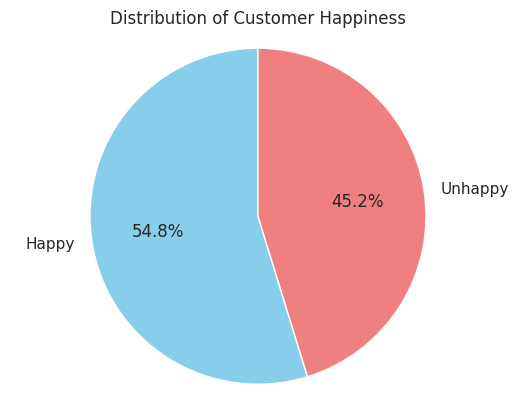

In [63]:
y_counts = data['Y'].value_counts()
labels = ['Happy', 'Unhappy']


plt.pie(y_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Customer Happiness')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The plot indicates that the number of happy customers exceeded the number of unhappy ones, although the margin between the two groups is relatively small.

Split my Data for trainng :


To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [64]:
Y=data['Y']
X=data[['X1','X2','X3','X4','X5','X6']]

Y_train, Y_test, X_train, X_test = train_test_split(Y, X, test_size=0.15, random_state=42)

**LazyPredict**  :

is a powerful Python library designed to streamline and partially automate machine learning workflows. It rapidly generates a wide range of baseline models with minimal coding effort, enabling users to efficiently compare algorithm performance prior to any hyperparameter tuning

In [65]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
#print(models)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.37
LabelSpreading,0.74,0.74,0.74,0.73,0.03
LabelPropagation,0.74,0.74,0.74,0.73,0.11
ExtraTreeClassifier,0.74,0.74,0.74,0.74,0.08
RandomForestClassifier,0.68,0.69,0.69,0.67,1.42
XGBClassifier,0.68,0.69,0.69,0.68,0.44
ExtraTreesClassifier,0.68,0.69,0.69,0.68,0.61
KNeighborsClassifier,0.63,0.64,0.64,0.61,0.04
BaggingClassifier,0.63,0.64,0.64,0.63,0.07


In [66]:
print("Top Performing Model:\n")
display(models.head(1))

Top Performing Model:



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.37


The table generated by LazyPredict provides a quick comparison of multiple classification models based on key performance metrics such as Accuracy, Balanced Accuracy, ROC AUC, F1 Score, and computation time. These metrics help evaluate how well each model handles both balanced and imbalanced data, measures class‑separation ability, and balances precision with recall. Among all tested models, the LGBMClassifier achieved the strongest overall performance across all major metrics, indicating it is the most suitable model for this dataset.

[Text(0, 0, 'LGBMClassifier'),
 Text(1, 0, 'LabelSpreading'),
 Text(2, 0, 'LabelPropagation'),
 Text(3, 0, 'ExtraTreeClassifier'),
 Text(4, 0, 'RandomForestClassifier'),
 Text(5, 0, 'XGBClassifier'),
 Text(6, 0, 'ExtraTreesClassifier'),
 Text(7, 0, 'KNeighborsClassifier'),
 Text(8, 0, 'BaggingClassifier'),
 Text(9, 0, 'QuadraticDiscriminantAnalysis'),
 Text(10, 0, 'AdaBoostClassifier'),
 Text(11, 0, 'SVC'),
 Text(12, 0, 'DecisionTreeClassifier'),
 Text(13, 0, 'NuSVC'),
 Text(14, 0, 'BernoulliNB'),
 Text(15, 0, 'Perceptron'),
 Text(16, 0, 'DummyClassifier'),
 Text(17, 0, 'NearestCentroid'),
 Text(18, 0, 'GaussianNB'),
 Text(19, 0, 'CalibratedClassifierCV'),
 Text(20, 0, 'LinearDiscriminantAnalysis'),
 Text(21, 0, 'LinearSVC'),
 Text(22, 0, 'LogisticRegression'),
 Text(23, 0, 'PassiveAggressiveClassifier'),
 Text(24, 0, 'RidgeClassifier'),
 Text(25, 0, 'RidgeClassifierCV'),
 Text(26, 0, 'SGDClassifier')]

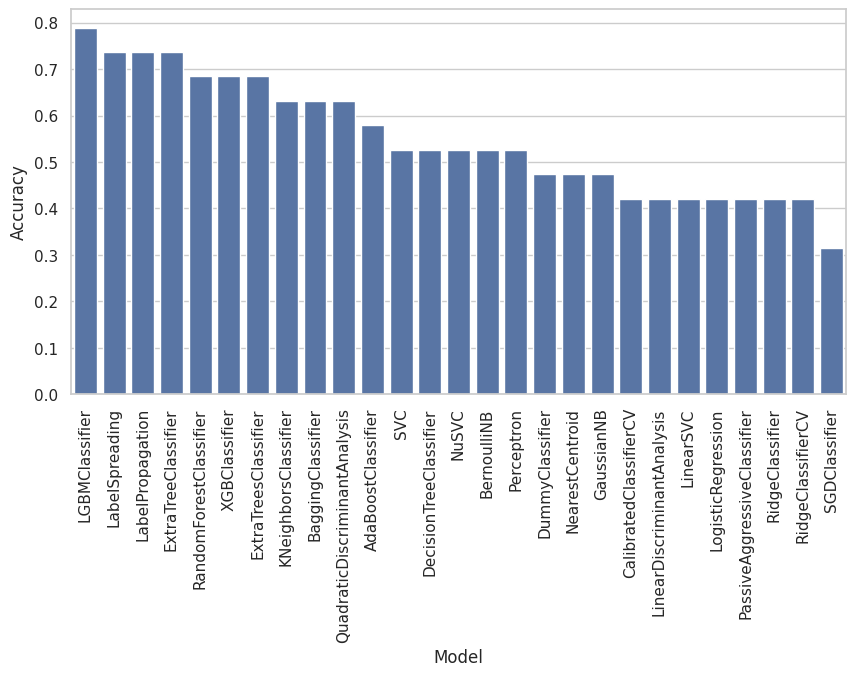

In [67]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax=sns.barplot(x=models.index, y="Accuracy", data=models)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


The LGBMClassifier showed consis
tently strong results across all major evaluation metrics in the LazyPredict analysis. These performance values indicate that the model is highly effective in distinguishing between classes below The following section presents the model’s performance

In [68]:
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import lightgbm as lgb
Y=data['Y']
X=data[['X1','X2','X3','X4','X5','X6']]

Y_train, Y_test, X_train, X_test = train_test_split(Y, X, test_size=0.15, random_state=42)


clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
# predict the results
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred)))

[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [69]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred)))

LightGBM Model accuracy score: 0.7895


Although the dataset appears balanced from a technical standpoint, the business reality is that half of the customers are dissatisfied. Prioritizing recall for Class 0 ensures you identify as many unhappy customers as possible, which ultimately delivers the greatest business value


Why Focus on Recall for Class 0
- Accuracy alone might look good (say 79%), but it hides the fact that unhappy customers are being missed.
- By focusing on recall for Class 0, you ensure the model captures as many unhappy customers as possible.
- This directly supports business goals: identifying dissatisfaction → improving operations → reducing churn.


Instead of relying only on accuracy, it’s more useful to look at the recall for Class 0. This tells us how well the model identifies unhappy customers, which is the group that matters most for improving business results. By focusing on this metric, we can better understand how effectively the model supports real business needs and helps target the customers who require the most attention
